In [1]:
%reload_ext autoreload
%autoreload 2

from ripple_heterogeneity.utils import (
    functions,
    loading,
    batch_analysis,
    add_new_deep_sup,
    custom_plots,
    compress_repeated_epochs
)
from ripple_heterogeneity.readout import assembly_multi_region, assembly_multi_region_member_ratemap_corr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
import os
import nelpy as nel
from statannotations.Annotator import Annotator
import glob
import pickle
import itertools
from ripple_heterogeneity.place_cells import maps
from scipy import stats

functions.set_plotting_defaults()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
fig_save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\figures\panels'

## locate sessions that were ran with assembly_multi_region

In [2]:
save_path = r"Z:\home\ryanh\projects\ripple_heterogeneity\assembly_multi_region_50ms_dt_10ms_z_dt_v3"
sessions = glob.glob(save_path + os.sep + "*.pkl")
sessions_df = pd.DataFrame()
sessions_df["basepath"] = sessions

In [3]:
sessions_df

,basepath
0,Z:\home\ryanh\projects\ripple_heterogeneity\as...
1,Z:\home\ryanh\projects\ripple_heterogeneity\as...
2,Z:\home\ryanh\projects\ripple_heterogeneity\as...
3,Z:\home\ryanh\projects\ripple_heterogeneity\as...
4,Z:\home\ryanh\projects\ripple_heterogeneity\as...
...,...
122,Z:\home\ryanh\projects\ripple_heterogeneity\as...
123,Z:\home\ryanh\projects\ripple_heterogeneity\as...
124,Z:\home\ryanh\projects\ripple_heterogeneity\as...
125,Z:\home\ryanh\projects\ripple_heterogeneity\as...


In [ ]:
# assembly_multi_region_member_ratemap_corr.run(
#     r"Z:\home\ryanh\projects\ripple_heterogeneity\assembly_multi_region_50ms_dt_10ms_z_dt\Z__Data_Kenji_ec014.427_456.pkl"
# )


In [3]:
# save_path = r"Z:\home\ryanh\projects\ripple_heterogeneity\assembly_multi_region_member_ratemap_corr_v5"
save_path = r"Z:\home\ryanh\projects\ripple_heterogeneity\assembly_multi_region_member_ratemap_corr_v6"

batch_analysis.run(
    sessions_df,
    save_path,
    assembly_multi_region_member_ratemap_corr.run,
    parallel=True,
    skip_if_error=False,
    verbose=False,
)

ccgs, label_df = assembly_multi_region_member_ratemap_corr.load_results(save_path)

100%|██████████| 127/127 [33:34<00:00, 15.86s/it]


In [23]:
label_df

,idx_ref,idx_tar,UID_ref,UID_tar,brainRegion_ref,brainRegion_tar,deepSuperficial_ref,deepSuperficial_tar,is_member_sig_ref,is_member_sig_tar,...,spatial_sparsity_tar,peak_rate_ref,peak_rate_tar,n_spikes_ref,n_spikes_tar,basepath,spatial_pval_ref,spatial_pval_tar,cross_label,ismembers
0,0.0,35.0,1.0,77.0,CA1,MEC,Deep,unknown,False,False,...,15.153061,2.906747,2.418036,676.0,479.0,Z:\Data\AYAold\AYA10\day12,NaN,NaN,Deep_MEC,nonmembers
1,0.0,36.0,1.0,78.0,CA1,MEC,Deep,unknown,False,False,...,6.607021,2.906747,3.639169,676.0,1451.0,Z:\Data\AYAold\AYA10\day12,NaN,NaN,Deep_MEC,nonmembers
2,0.0,37.0,1.0,79.0,CA1,MEC,Deep,unknown,False,False,...,9.184273,2.906747,3.600053,676.0,483.0,Z:\Data\AYAold\AYA10\day12,NaN,NaN,Deep_MEC,nonmembers
3,0.0,38.0,1.0,84.0,CA1,MEC,Deep,unknown,False,False,...,181.335393,2.906747,1.280851,676.0,36.0,Z:\Data\AYAold\AYA10\day12,NaN,NaN,Deep_MEC,nonmembers
4,0.0,39.0,1.0,88.0,CA1,MEC,Deep,unknown,False,False,...,3.887440,2.906747,8.728443,676.0,2411.0,Z:\Data\AYAold\AYA10\day12,NaN,NaN,Deep_MEC,nonmembers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900139,52.0,33.0,71.0,40.0,CA1,PFC,Superficial,unknown,False,False,...,0.281011,4.428701,61.397246,490.0,16016.0,Z:\Data\ORproject\OR18\day3,NaN,NaN,Superficial_PFC,nonmembers
1900140,53.0,33.0,72.0,40.0,CA1,PFC,Deep,unknown,True,False,...,0.281011,16.010066,61.397246,6970.0,16016.0,Z:\Data\ORproject\OR18\day3,NaN,NaN,Deep_PFC,nonmembers
1900141,54.0,33.0,73.0,40.0,CA1,PFC,Deep,unknown,False,False,...,0.281011,7.627348,61.397246,1945.0,16016.0,Z:\Data\ORproject\OR18\day3,NaN,NaN,Deep_PFC,nonmembers
1900142,55.0,33.0,78.0,40.0,CA1,PFC,Deep,unknown,False,False,...,0.281011,13.200592,61.397246,3195.0,16016.0,Z:\Data\ORproject\OR18\day3,NaN,NaN,Deep_PFC,nonmembers


In [4]:
label_df["cross_label"] = label_df.deepSuperficial_ref + "_" + label_df.brainRegion_tar
label_df.loc[(label_df.is_member_sig_ref == True) & (label_df.is_member_sig_tar == True), "ismembers"] = "members"
label_df.loc[(label_df.is_member_sig_ref == False) | (label_df.is_member_sig_tar == False), "ismembers"] = "nonmembers"

label_df

,idx_ref,idx_tar,UID_ref,UID_tar,brainRegion_ref,brainRegion_tar,deepSuperficial_ref,deepSuperficial_tar,is_member_sig_ref,is_member_sig_tar,...,spatial_sparsity_tar,peak_rate_ref,peak_rate_tar,n_spikes_ref,n_spikes_tar,basepath,spatial_pval_ref,spatial_pval_tar,cross_label,ismembers
0,0.0,35.0,1.0,77.0,CA1,MEC,Deep,unknown,False,False,...,15.153061,2.906747,2.418036,676.0,479.0,Z:\Data\AYAold\AYA10\day12,NaN,NaN,Deep_MEC,nonmembers
1,0.0,36.0,1.0,78.0,CA1,MEC,Deep,unknown,False,False,...,6.607021,2.906747,3.639169,676.0,1451.0,Z:\Data\AYAold\AYA10\day12,NaN,NaN,Deep_MEC,nonmembers
2,0.0,37.0,1.0,79.0,CA1,MEC,Deep,unknown,False,False,...,9.184273,2.906747,3.600053,676.0,483.0,Z:\Data\AYAold\AYA10\day12,NaN,NaN,Deep_MEC,nonmembers
3,0.0,38.0,1.0,84.0,CA1,MEC,Deep,unknown,False,False,...,181.335393,2.906747,1.280851,676.0,36.0,Z:\Data\AYAold\AYA10\day12,NaN,NaN,Deep_MEC,nonmembers
4,0.0,39.0,1.0,88.0,CA1,MEC,Deep,unknown,False,False,...,3.887440,2.906747,8.728443,676.0,2411.0,Z:\Data\AYAold\AYA10\day12,NaN,NaN,Deep_MEC,nonmembers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900139,52.0,33.0,71.0,40.0,CA1,PFC,Superficial,unknown,False,False,...,0.281011,4.428701,61.397246,490.0,16016.0,Z:\Data\ORproject\OR18\day3,NaN,NaN,Superficial_PFC,nonmembers
1900140,53.0,33.0,72.0,40.0,CA1,PFC,Deep,unknown,True,False,...,0.281011,16.010066,61.397246,6970.0,16016.0,Z:\Data\ORproject\OR18\day3,NaN,NaN,Deep_PFC,nonmembers
1900141,54.0,33.0,73.0,40.0,CA1,PFC,Deep,unknown,False,False,...,0.281011,7.627348,61.397246,1945.0,16016.0,Z:\Data\ORproject\OR18\day3,NaN,NaN,Deep_PFC,nonmembers
1900142,55.0,33.0,78.0,40.0,CA1,PFC,Deep,unknown,False,False,...,0.281011,13.200592,61.397246,3195.0,16016.0,Z:\Data\ORproject\OR18\day3,NaN,NaN,Deep_PFC,nonmembers


<AxesSubplot: >

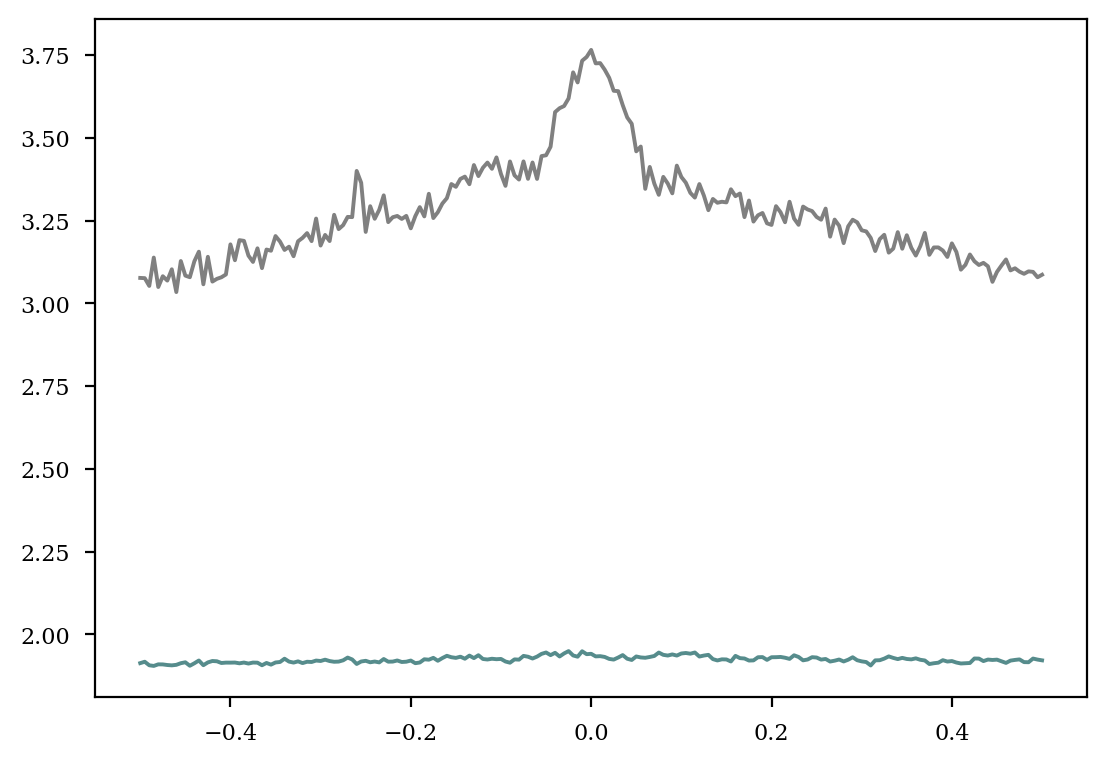

In [29]:
ccgs.loc[:,label_df.ismembers=="members"].mean(axis=1).plot()
ccgs.loc[:,label_df.ismembers=="nonmembers"].mean(axis=1).plot()


In [ ]:
label_df.query("ismembers=='members'").basepath.value_counts()

In [6]:
label_df.keys()

Index(['idx_ref', 'idx_tar', 'UID_ref', 'UID_tar', 'brainRegion_ref',
       'brainRegion_tar', 'deepSuperficial_ref', 'deepSuperficial_tar',
       'is_member_sig_ref', 'is_member_sig_tar', 'assembly_n', 'spatial_corr',
       'spatial_info_ref', 'spatial_info_tar', 'spatial_sparsity_ref',
       'spatial_sparsity_tar', 'peak_rate_ref', 'peak_rate_tar',
       'n_spikes_ref', 'n_spikes_tar', 'basepath', 'spatial_pval_ref',
       'spatial_pval_tar', 'cross_label', 'ismembers'],
      dtype='object')

<AxesSubplot: xlabel='peak_rate_ref', ylabel='spatial_info_ref'>

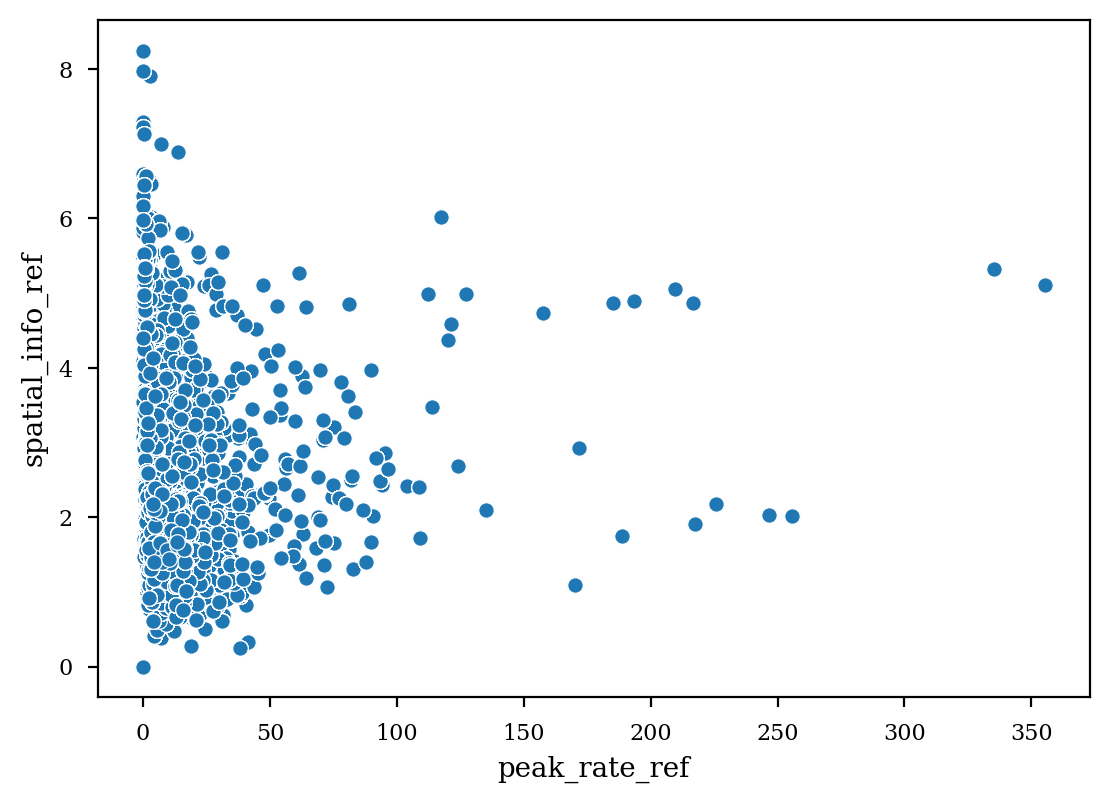

In [7]:
sns.scatterplot(data=label_df, x="peak_rate_ref",y="spatial_info_ref")

In [8]:
label_df.query("ismembers == 'members' & cross_label == 'Superficial_MEC' & n_spikes_ref > 100 & n_spikes_tar > 100 & peak_rate_ref > 2 & peak_rate_tar > 2").head(10)

,idx_ref,idx_tar,UID_ref,UID_tar,brainRegion_ref,brainRegion_tar,deepSuperficial_ref,deepSuperficial_tar,is_member_sig_ref,is_member_sig_tar,...,spatial_sparsity_tar,peak_rate_ref,peak_rate_tar,n_spikes_ref,n_spikes_tar,basepath,spatial_pval_ref,spatial_pval_tar,cross_label,ismembers
207559,40.0,62.0,100.0,219.0,CA1,MEC,Superficial,unknown,True,True,...,1.940101,3.030426,65.758405,282.0,3301.0,Z:\Data\AYAold\AYA9\day20,0.666667,0.546906,Superficial_MEC,members
207566,40.0,69.0,100.0,229.0,CA1,MEC,Superficial,unknown,True,True,...,2.152463,3.030426,64.331721,282.0,9860.0,Z:\Data\AYAold\AYA9\day20,0.666667,0.658683,Superficial_MEC,members
207569,40.0,72.0,100.0,235.0,CA1,MEC,Superficial,unknown,True,True,...,1.973477,3.030426,48.538586,282.0,13929.0,Z:\Data\AYAold\AYA9\day20,0.666667,0.662675,Superficial_MEC,members
578418,163.0,252.0,222.0,333.0,CA1,MEC,Superficial,unknown,True,True,...,1.695403,14.010419,23.862540,807.0,2816.0,Z:\Data\HMC1\day10,NaN,NaN,Superficial_MEC,members
806196,176.0,238.0,235.0,306.0,CA1,MEC,Superficial,unknown,True,True,...,0.150904,9.952319,89.629042,536.0,60710.0,Z:\Data\HMC1\day10,NaN,NaN,Superficial_MEC,members
849767,106.0,205.0,185.0,307.0,CA1,MEC,Superficial,unknown,True,True,...,2.237798,12.419423,17.735287,974.0,1625.0,Z:\Data\HMC1\day12,NaN,NaN,Superficial_MEC,members
849829,107.0,205.0,186.0,307.0,CA1,MEC,Superficial,unknown,True,True,...,2.237798,3.034694,17.735287,207.0,1625.0,Z:\Data\HMC1\day12,NaN,NaN,Superficial_MEC,members
850635,123.0,205.0,209.0,307.0,CA1,MEC,Superficial,unknown,True,True,...,2.237798,5.025686,17.735287,365.0,1625.0,Z:\Data\HMC1\day12,NaN,NaN,Superficial_MEC,members
850883,127.0,205.0,213.0,307.0,CA1,MEC,Superficial,unknown,True,True,...,2.237798,15.283347,17.735287,1180.0,1625.0,Z:\Data\HMC1\day12,NaN,NaN,Superficial_MEC,members
851069,131.0,205.0,217.0,307.0,CA1,MEC,Superficial,unknown,True,True,...,2.237798,4.463903,17.735287,431.0,1625.0,Z:\Data\HMC1\day12,NaN,NaN,Superficial_MEC,members


In [12]:
basepath = "Z:\Data\AYAold\AYA9\day12"
label_df.query("basepath == @basepath & ismembers == 'members'")[["UID_ref","UID_tar","ismembers","assembly_n"]]

,UID_ref,UID_tar,ismembers,assembly_n
103434,57.0,101.0,members,2.0
103443,57.0,111.0,members,2.0
103446,57.0,114.0,members,2.0
103453,57.0,122.0,members,2.0
103478,57.0,149.0,members,2.0
...,...,...,...,...
1933903,43.0,173.0,members,5.0
1934219,48.0,173.0,members,5.0
1934377,57.0,173.0,members,5.0
1934535,62.0,173.0,members,5.0


In [14]:
basepath = "Z:\Data\AYAold\AYA9\day12"
current_members_df = label_df[(label_df.basepath == basepath) & (label_df.ismembers == 'members')]
current_nonmembers_df = label_df[(label_df.basepath == basepath) & (label_df.ismembers == 'nonmembers')]

idx = (np.in1d(current_nonmembers_df.idx_ref,current_members_df.idx_ref) & np.in1d(current_nonmembers_df.idx_tar,current_members_df.idx_tar))

current_nonmembers_df.loc[idx,"spatial_corr"] = np.nan

label_df.loc[(label_df.basepath == basepath) & (label_df.ismembers == 'nonmembers'),"spatial_corr"] = current_nonmembers_df.spatial_corr.values

In [16]:
current_members_df

,idx_ref,idx_tar,UID_ref,UID_tar,brainRegion_ref,brainRegion_tar,deepSuperficial_ref,deepSuperficial_tar,is_member_sig_ref,is_member_sig_tar,...,spatial_info_tar,spatial_sparsity_ref,spatial_sparsity_tar,peak_rate_ref,peak_rate_tar,n_spikes_ref,n_spikes_tar,basepath,cross_label,ismembers
103434,37.0,52.0,57.0,101.0,CA1,MEC,Deep,unknown,True,True,...,0.384644,4.912944,0.420361,7.026404,11.054615,671.0,5148.0,Z:\Data\AYAold\AYA9\day12,Deep_MEC,members
103443,37.0,61.0,57.0,111.0,CA1,MEC,Deep,unknown,True,True,...,0.438069,4.912944,0.563398,7.026404,6.435479,671.0,4637.0,Z:\Data\AYAold\AYA9\day12,Deep_MEC,members
103446,37.0,64.0,57.0,114.0,CA1,MEC,Deep,unknown,True,True,...,0.904617,4.912944,3.575986,7.026404,2.521163,671.0,476.0,Z:\Data\AYAold\AYA9\day12,Deep_MEC,members
103453,37.0,71.0,57.0,122.0,CA1,MEC,Deep,unknown,True,True,...,3.043711,4.912944,36.223220,7.026404,1.616328,671.0,53.0,Z:\Data\AYAold\AYA9\day12,Deep_MEC,members
103478,37.0,96.0,57.0,149.0,CA1,MEC,Deep,unknown,True,True,...,1.033590,4.912944,3.293249,7.026404,3.622947,671.0,637.0,Z:\Data\AYAold\AYA9\day12,Deep_MEC,members
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1933903,29.0,115.0,43.0,173.0,CA1,MEC,Superficial,unknown,True,True,...,2.537727,6.727141,20.801239,2.311604,1.504753,319.0,123.0,Z:\Data\AYAold\AYA9\day12,Superficial_MEC,members
1934219,33.0,115.0,48.0,173.0,CA1,MEC,Superficial,unknown,True,True,...,2.537727,0.437664,20.801239,11.959039,1.504753,5277.0,123.0,Z:\Data\AYAold\AYA9\day12,Superficial_MEC,members
1934377,37.0,115.0,57.0,173.0,CA1,MEC,Deep,unknown,True,True,...,2.537727,4.136731,20.801239,3.795340,1.504753,671.0,123.0,Z:\Data\AYAold\AYA9\day12,Deep_MEC,members
1934535,42.0,115.0,62.0,173.0,CA1,MEC,Superficial,unknown,True,True,...,2.537727,12.051416,20.801239,1.858084,1.504753,420.0,123.0,Z:\Data\AYAold\AYA9\day12,Superficial_MEC,members


In [17]:
current_nonmembers_df.spatial_corr.unique()

array([0.13672243, 0.02524034, 0.1551052 , ..., 0.04389102, 0.02397996,
       0.12620826])

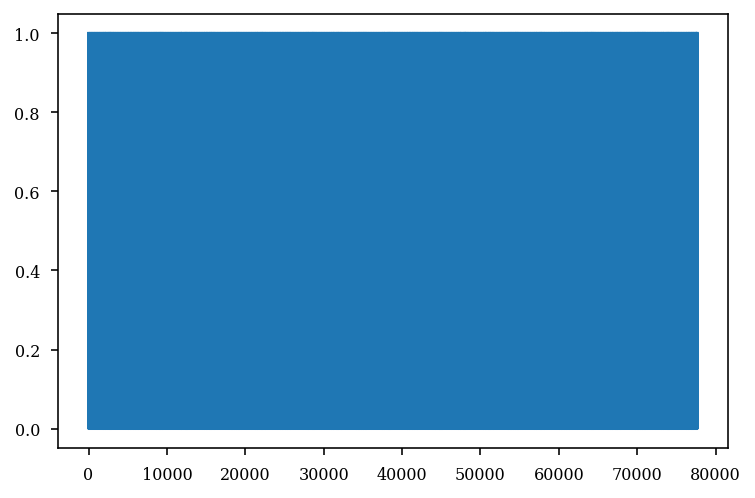

In [18]:
current_nonmembers_df
plt.plot(np.in1d(current_nonmembers_df.spatial_corr,current_nonmembers_df.spatial_corr.unique()))

In [19]:

current_nonmembers_df[np.isnan(current_nonmembers_df.spatial_corr)]

,idx_ref,idx_tar,UID_ref,UID_tar,brainRegion_ref,brainRegion_tar,deepSuperficial_ref,deepSuperficial_tar,is_member_sig_ref,is_member_sig_tar,...,spatial_info_tar,spatial_sparsity_ref,spatial_sparsity_tar,peak_rate_ref,peak_rate_tar,n_spikes_ref,n_spikes_tar,basepath,cross_label,ismembers
94364,0.0,67.0,1.0,118.0,CA1,MEC,Deep,unknown,False,False,...,9.610280e-16,0.376635,NaN,16.536834,0.000000,8820.0,0.0,Z:\Data\AYAold\AYA9\day12,Deep_MEC,nonmembers
94370,0.0,73.0,1.0,124.0,CA1,MEC,Deep,unknown,False,False,...,9.610280e-16,0.376635,NaN,16.536834,0.000000,8820.0,0.0,Z:\Data\AYAold\AYA9\day12,Deep_MEC,nonmembers
94418,0.0,121.0,1.0,183.0,CA1,MEC,Deep,unknown,False,False,...,9.610280e-16,0.376635,NaN,16.536834,0.000000,8820.0,0.0,Z:\Data\AYAold\AYA9\day12,Deep_MEC,nonmembers
94443,1.0,67.0,2.0,118.0,CA1,MEC,Deep,unknown,False,False,...,9.610280e-16,16.365976,NaN,2.073049,0.000000,137.0,0.0,Z:\Data\AYAold\AYA9\day12,Deep_MEC,nonmembers
94449,1.0,73.0,2.0,124.0,CA1,MEC,Deep,unknown,False,False,...,9.610280e-16,16.365976,NaN,2.073049,0.000000,137.0,0.0,Z:\Data\AYAold\AYA9\day12,Deep_MEC,nonmembers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1954287,48.0,117.0,72.0,176.0,CA1,MEC,Superficial,unknown,False,False,...,9.213438e-01,0.207560,1.699767,18.978057,3.987487,13009.0,1957.0,Z:\Data\AYAold\AYA9\day12,Superficial_MEC,nonmembers
1954291,48.0,121.0,72.0,183.0,CA1,MEC,Superficial,unknown,False,False,...,3.203427e-16,0.207560,NaN,18.978057,0.000000,13009.0,0.0,Z:\Data\AYAold\AYA9\day12,Superficial_MEC,nonmembers
1954316,49.0,67.0,73.0,118.0,CA1,MEC,Deep,unknown,False,False,...,3.203427e-16,120.500733,NaN,1.003146,0.000000,12.0,0.0,Z:\Data\AYAold\AYA9\day12,Deep_MEC,nonmembers
1954322,49.0,73.0,73.0,124.0,CA1,MEC,Deep,unknown,False,False,...,3.203427e-16,120.500733,NaN,1.003146,0.000000,12.0,0.0,Z:\Data\AYAold\AYA9\day12,Deep_MEC,nonmembers


## remove non members correlations if the pair was members in another assembly

In [9]:
for basepath in label_df.basepath.unique():
    current_members_df = label_df[
        (label_df.basepath == basepath) & (label_df.ismembers == "members")
    ]
    current_nonmembers_df = label_df[
        (label_df.basepath == basepath) & (label_df.ismembers == "nonmembers")
    ]
    # locate the index of members pairs within other assemblies in which they were not members
    idx = np.in1d(current_nonmembers_df.idx_ref, current_members_df.idx_ref) & np.in1d(
        current_nonmembers_df.idx_tar, current_members_df.idx_tar
    )
    current_nonmembers_df.loc[idx, "spatial_corr"] = np.nan

    label_df.loc[
        (label_df.basepath == basepath) & (label_df.ismembers == "nonmembers"),
        "spatial_corr",
    ] = current_nonmembers_df.spatial_corr.values


In [10]:
test_df = label_df.query("ismembers=='members'")[["basepath","UID_ref","UID_tar","assembly_n","ismembers"]].value_counts().reset_index().sort_values(["basepath","assembly_n"])
test_df
# test_df.query("basepath == 'Z:\Data\FujisawaS\EE\EE0705fm'")

,basepath,UID_ref,UID_tar,assembly_n,ismembers,0
421,Z:\Data\AYAold\AYA10\day12,45.0,163.0,4.0,members,1
422,Z:\Data\AYAold\AYA10\day12,45.0,168.0,4.0,members,1
423,Z:\Data\AYAold\AYA10\day12,50.0,163.0,4.0,members,1
424,Z:\Data\AYAold\AYA10\day12,50.0,168.0,4.0,members,1
0,Z:\Data\AYAold\AYA10\day12,25.0,107.0,9.0,members,1
...,...,...,...,...,...,...
215,Z:\Data\ORproject\OR18\day3,56.0,20.0,4.0,members,1
216,Z:\Data\ORproject\OR18\day3,57.0,20.0,4.0,members,1
214,Z:\Data\ORproject\OR18\day3,54.0,8.0,5.0,members,1
217,Z:\Data\ORproject\OR18\day3,58.0,8.0,5.0,members,1


In [11]:
idx = "n_spikes_ref > 100 & n_spikes_tar > 100 & peak_rate_ref > 2 & peak_rate_tar > 2 & ismembers == 'nonmembers'"

label_df.query(idx)

,idx_ref,idx_tar,UID_ref,UID_tar,brainRegion_ref,brainRegion_tar,deepSuperficial_ref,deepSuperficial_tar,is_member_sig_ref,is_member_sig_tar,...,spatial_sparsity_tar,peak_rate_ref,peak_rate_tar,n_spikes_ref,n_spikes_tar,basepath,spatial_pval_ref,spatial_pval_tar,cross_label,ismembers
0,0.0,35.0,1.0,77.0,CA1,MEC,Deep,unknown,False,False,...,15.153061,2.906747,2.418036,676.0,479.0,Z:\Data\AYAold\AYA10\day12,NaN,NaN,Deep_MEC,nonmembers
1,0.0,36.0,1.0,78.0,CA1,MEC,Deep,unknown,False,False,...,6.607021,2.906747,3.639169,676.0,1451.0,Z:\Data\AYAold\AYA10\day12,NaN,NaN,Deep_MEC,nonmembers
2,0.0,37.0,1.0,79.0,CA1,MEC,Deep,unknown,False,False,...,9.184273,2.906747,3.600053,676.0,483.0,Z:\Data\AYAold\AYA10\day12,NaN,NaN,Deep_MEC,nonmembers
4,0.0,39.0,1.0,88.0,CA1,MEC,Deep,unknown,False,False,...,3.887440,2.906747,8.728443,676.0,2411.0,Z:\Data\AYAold\AYA10\day12,NaN,NaN,Deep_MEC,nonmembers
6,0.0,41.0,1.0,93.0,CA1,MEC,Deep,unknown,False,False,...,3.141565,2.906747,9.995303,676.0,2660.0,Z:\Data\AYAold\AYA10\day12,NaN,NaN,Deep_MEC,nonmembers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900139,52.0,33.0,71.0,40.0,CA1,PFC,Superficial,unknown,False,False,...,0.281011,4.428701,61.397246,490.0,16016.0,Z:\Data\ORproject\OR18\day3,NaN,NaN,Superficial_PFC,nonmembers
1900140,53.0,33.0,72.0,40.0,CA1,PFC,Deep,unknown,True,False,...,0.281011,16.010066,61.397246,6970.0,16016.0,Z:\Data\ORproject\OR18\day3,NaN,NaN,Deep_PFC,nonmembers
1900141,54.0,33.0,73.0,40.0,CA1,PFC,Deep,unknown,False,False,...,0.281011,7.627348,61.397246,1945.0,16016.0,Z:\Data\ORproject\OR18\day3,NaN,NaN,Deep_PFC,nonmembers
1900142,55.0,33.0,78.0,40.0,CA1,PFC,Deep,unknown,False,False,...,0.281011,13.200592,61.397246,3195.0,16016.0,Z:\Data\ORproject\OR18\day3,NaN,NaN,Deep_PFC,nonmembers


In [12]:
label_df

,idx_ref,idx_tar,UID_ref,UID_tar,brainRegion_ref,brainRegion_tar,deepSuperficial_ref,deepSuperficial_tar,is_member_sig_ref,is_member_sig_tar,...,spatial_sparsity_tar,peak_rate_ref,peak_rate_tar,n_spikes_ref,n_spikes_tar,basepath,spatial_pval_ref,spatial_pval_tar,cross_label,ismembers
0,0.0,35.0,1.0,77.0,CA1,MEC,Deep,unknown,False,False,...,15.153061,2.906747,2.418036,676.0,479.0,Z:\Data\AYAold\AYA10\day12,NaN,NaN,Deep_MEC,nonmembers
1,0.0,36.0,1.0,78.0,CA1,MEC,Deep,unknown,False,False,...,6.607021,2.906747,3.639169,676.0,1451.0,Z:\Data\AYAold\AYA10\day12,NaN,NaN,Deep_MEC,nonmembers
2,0.0,37.0,1.0,79.0,CA1,MEC,Deep,unknown,False,False,...,9.184273,2.906747,3.600053,676.0,483.0,Z:\Data\AYAold\AYA10\day12,NaN,NaN,Deep_MEC,nonmembers
3,0.0,38.0,1.0,84.0,CA1,MEC,Deep,unknown,False,False,...,181.335393,2.906747,1.280851,676.0,36.0,Z:\Data\AYAold\AYA10\day12,NaN,NaN,Deep_MEC,nonmembers
4,0.0,39.0,1.0,88.0,CA1,MEC,Deep,unknown,False,False,...,3.887440,2.906747,8.728443,676.0,2411.0,Z:\Data\AYAold\AYA10\day12,NaN,NaN,Deep_MEC,nonmembers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900139,52.0,33.0,71.0,40.0,CA1,PFC,Superficial,unknown,False,False,...,0.281011,4.428701,61.397246,490.0,16016.0,Z:\Data\ORproject\OR18\day3,NaN,NaN,Superficial_PFC,nonmembers
1900140,53.0,33.0,72.0,40.0,CA1,PFC,Deep,unknown,True,False,...,0.281011,16.010066,61.397246,6970.0,16016.0,Z:\Data\ORproject\OR18\day3,NaN,NaN,Deep_PFC,nonmembers
1900141,54.0,33.0,73.0,40.0,CA1,PFC,Deep,unknown,False,False,...,0.281011,7.627348,61.397246,1945.0,16016.0,Z:\Data\ORproject\OR18\day3,NaN,NaN,Deep_PFC,nonmembers
1900142,55.0,33.0,78.0,40.0,CA1,PFC,Deep,unknown,False,False,...,0.281011,13.200592,61.397246,3195.0,16016.0,Z:\Data\ORproject\OR18\day3,NaN,NaN,Deep_PFC,nonmembers


In [13]:
label_df.drop_duplicates(subset=["spatial_corr"])

,idx_ref,idx_tar,UID_ref,UID_tar,brainRegion_ref,brainRegion_tar,deepSuperficial_ref,deepSuperficial_tar,is_member_sig_ref,is_member_sig_tar,...,spatial_sparsity_tar,peak_rate_ref,peak_rate_tar,n_spikes_ref,n_spikes_tar,basepath,spatial_pval_ref,spatial_pval_tar,cross_label,ismembers
0,0.0,35.0,1.0,77.0,CA1,MEC,Deep,unknown,False,False,...,15.153061,2.906747,2.418036,676.0,479.0,Z:\Data\AYAold\AYA10\day12,NaN,NaN,Deep_MEC,nonmembers
1,0.0,36.0,1.0,78.0,CA1,MEC,Deep,unknown,False,False,...,6.607021,2.906747,3.639169,676.0,1451.0,Z:\Data\AYAold\AYA10\day12,NaN,NaN,Deep_MEC,nonmembers
2,0.0,37.0,1.0,79.0,CA1,MEC,Deep,unknown,False,False,...,9.184273,2.906747,3.600053,676.0,483.0,Z:\Data\AYAold\AYA10\day12,NaN,NaN,Deep_MEC,nonmembers
3,0.0,38.0,1.0,84.0,CA1,MEC,Deep,unknown,False,False,...,181.335393,2.906747,1.280851,676.0,36.0,Z:\Data\AYAold\AYA10\day12,NaN,NaN,Deep_MEC,nonmembers
4,0.0,39.0,1.0,88.0,CA1,MEC,Deep,unknown,False,False,...,3.887440,2.906747,8.728443,676.0,2411.0,Z:\Data\AYAold\AYA10\day12,NaN,NaN,Deep_MEC,nonmembers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1898931,43.0,13.0,56.0,20.0,CA1,PFC,Deep,unknown,True,True,...,0.346757,6.874819,39.400295,1590.0,15813.0,Z:\Data\ORproject\OR18\day3,NaN,NaN,Deep_PFC,members
1898932,44.0,13.0,57.0,20.0,CA1,PFC,Deep,unknown,True,True,...,0.346757,16.701804,39.400295,3800.0,15813.0,Z:\Data\ORproject\OR18\day3,NaN,NaN,Deep_PFC,members
1899490,41.0,4.0,54.0,8.0,CA1,PFC,Deep,unknown,True,True,...,0.420186,2.518495,31.360559,1479.0,14376.0,Z:\Data\ORproject\OR18\day3,NaN,NaN,Deep_PFC,members
1899494,45.0,4.0,58.0,8.0,CA1,PFC,Deep,unknown,True,True,...,0.420186,9.540567,31.360559,2423.0,14376.0,Z:\Data\ORproject\OR18\day3,NaN,NaN,Deep_PFC,members


In [14]:
label_df.ismembers.value_counts()


nonmembers    1899508
members           636
Name: ismembers, dtype: int64

In [15]:
label_df.drop_duplicates(subset=["idx_ref","idx_tar","spatial_corr"]).ismembers.value_counts()


nonmembers    118390
members          631
Name: ismembers, dtype: int64

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Superficial_MEC_nonmembers vs. Superficial_MEC_members: Mann-Whitney-Wilcoxon test two-sided, P_val:9.869e-01 U_stat=2.784e+05
Deep_MEC_nonmembers vs. Deep_MEC_members: Mann-Whitney-Wilcoxon test two-sided, P_val:4.595e-01 U_stat=1.176e+06
Superficial_PFC_nonmembers vs. Superficial_PFC_members: Mann-Whitney-Wilcoxon test two-sided, P_val:1.283e-07 U_stat=8.533e+05
Deep_PFC_nonmembers vs. Deep_PFC_members: Mann-Whitney-Wilcoxon test two-sided, P_val:6.788e-01 U_stat=3.907e+06
Deep_MEC_members vs. Superficial_MEC_members: Mann-Whitney-Wilcoxon test two-sided, P_val:3.660e-01 U_stat=3.404e+03
Superficial_PFC_members vs. Deep_PFC_members: Mann-Whitney-Wilcoxon test two-sided, P_val:6.483e-06 U_stat=1.726e+04


(<AxesSubplot: xlabel='cross_label', ylabel='spatial_corr'>,
  <statannotations.Annotation.Annotation at 0x1e533cf19d0>])

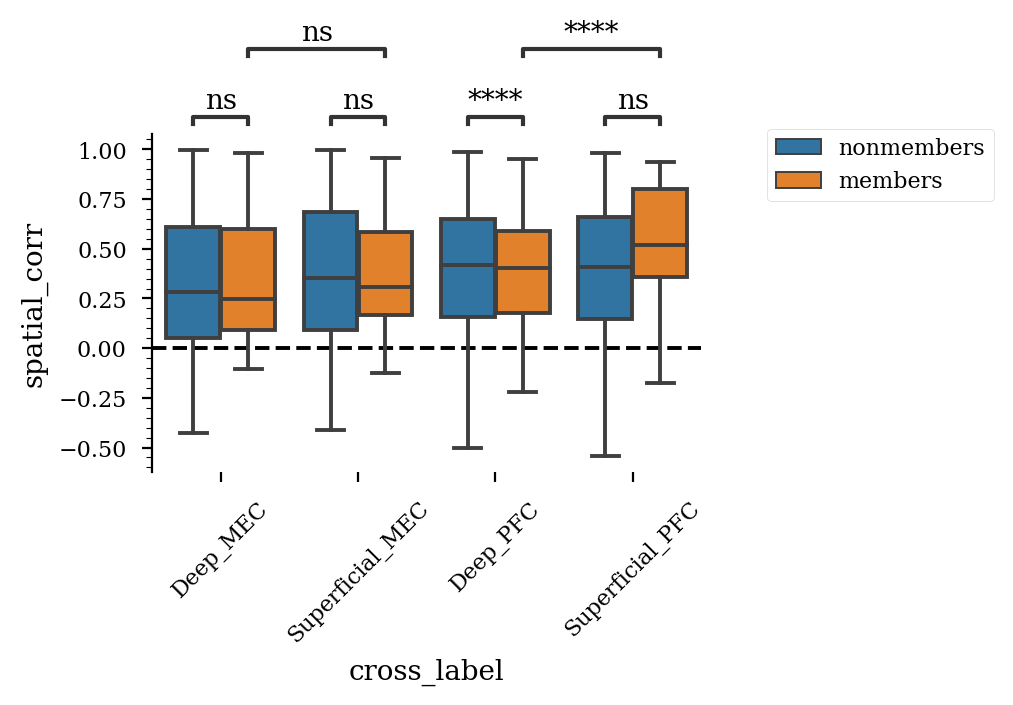

In [16]:
fig = plt.figure(
    figsize=functions.set_size("thesis", fraction=.6, subplots=(1, 1)), edgecolor=None
)
# drop duplicates
label_df_subset = label_df.drop_duplicates(subset=["idx_ref","idx_tar","spatial_corr"])

idx = "n_spikes_ref > 100 & n_spikes_tar > 100 & peak_rate_ref > 2 & peak_rate_tar > 2"
sns.boxplot(
    data=label_df_subset.query(idx),
    y="spatial_corr",
    x="cross_label",
    order=["Deep_MEC", "Superficial_MEC", "Deep_PFC", "Superficial_PFC"],
    hue="ismembers",
    showfliers=False,
)
# sns.stripplot(data=label_df.query(idx),y="spatial_corr",x="cross_label",hue="ismembers",dodge=True,color="k",size=5)
sns.despine(bottom=True)
plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
plt.axhline(0, color="k", linestyle="--", zorder=-1000)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.xticks(rotation=45)

box_pairs = [
    (("Deep_MEC", "members"), ("Deep_MEC", "nonmembers")),
    (("Superficial_MEC", "members"), ("Superficial_MEC", "nonmembers")),
    (("Superficial_PFC", "members"), ("Superficial_PFC", "nonmembers")),
    (("Deep_PFC", "members"), ("Deep_PFC", "nonmembers")),
    (("Deep_MEC", "members"), ("Superficial_MEC", "members")),
    (("Deep_PFC", "members"), ("Superficial_PFC", "members")),

]
annotator = Annotator(
    plt.gca(),
    box_pairs,
    data=label_df_subset.query(idx),
    x="cross_label",
    y="spatial_corr",
    hue="ismembers",
)
annotator.configure(
    test="Mann-Whitney",
    text_format="star",
    loc="outside",
    comparisons_correction=None,
    verbose=1,
)
annotator.apply_and_annotate()

# plt.savefig(
#     os.path.join(fig_save_path, "ratemap_corr_cross_region_assemblies.svg"),
#     dpi=300,
#     bbox_inches="tight",
# )

In [17]:
idx = "n_spikes_ref > 100 & n_spikes_tar > 100 & peak_rate_ref > 2 & peak_rate_tar > 2 & cross_label == 'Deep_MEC'"
label_df_subset.query(idx)

,idx_ref,idx_tar,UID_ref,UID_tar,brainRegion_ref,brainRegion_tar,deepSuperficial_ref,deepSuperficial_tar,is_member_sig_ref,is_member_sig_tar,...,spatial_sparsity_tar,peak_rate_ref,peak_rate_tar,n_spikes_ref,n_spikes_tar,basepath,spatial_pval_ref,spatial_pval_tar,cross_label,ismembers
0,0.0,35.0,1.0,77.0,CA1,MEC,Deep,unknown,False,False,...,15.153061,2.906747,2.418036,676.0,479.0,Z:\Data\AYAold\AYA10\day12,NaN,NaN,Deep_MEC,nonmembers
1,0.0,36.0,1.0,78.0,CA1,MEC,Deep,unknown,False,False,...,6.607021,2.906747,3.639169,676.0,1451.0,Z:\Data\AYAold\AYA10\day12,NaN,NaN,Deep_MEC,nonmembers
2,0.0,37.0,1.0,79.0,CA1,MEC,Deep,unknown,False,False,...,9.184273,2.906747,3.600053,676.0,483.0,Z:\Data\AYAold\AYA10\day12,NaN,NaN,Deep_MEC,nonmembers
4,0.0,39.0,1.0,88.0,CA1,MEC,Deep,unknown,False,False,...,3.887440,2.906747,8.728443,676.0,2411.0,Z:\Data\AYAold\AYA10\day12,NaN,NaN,Deep_MEC,nonmembers
6,0.0,41.0,1.0,93.0,CA1,MEC,Deep,unknown,False,False,...,3.141565,2.906747,9.995303,676.0,2660.0,Z:\Data\AYAold\AYA10\day12,NaN,NaN,Deep_MEC,nonmembers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1887659,7.0,74.0,13.0,96.0,CA1,MEC,Deep,unknown,True,False,...,1.009042,14.974943,8.867616,2203.0,5755.0,Z:\Data\Kenji\ec016.577_590,NaN,NaN,Deep_MEC,nonmembers
1887660,7.0,75.0,13.0,100.0,CA1,MEC,Deep,unknown,True,False,...,1.173302,14.974943,5.325970,2203.0,5670.0,Z:\Data\Kenji\ec016.577_590,NaN,NaN,Deep_MEC,nonmembers
1887661,7.0,76.0,13.0,101.0,CA1,MEC,Deep,unknown,True,False,...,0.124504,14.974943,16.522564,2203.0,50335.0,Z:\Data\Kenji\ec016.577_590,NaN,NaN,Deep_MEC,nonmembers
1887662,7.0,77.0,13.0,102.0,CA1,MEC,Deep,unknown,True,False,...,1.886615,14.974943,12.297198,2203.0,2872.0,Z:\Data\Kenji\ec016.577_590,NaN,NaN,Deep_MEC,nonmembers


C:\Users\Cornell\AppData\Local\Temp\ipykernel_28528\2540577573.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1_nonmembers vs. 1_members: Mann-Whitney-Wilcoxon test two-sided, P_val:4.595e-01 U_stat=1.176e+06
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1_nonmembers vs. 1_members: Mann-Whitney-Wilcoxon test two-sided, P_val:9.869e-01 U_stat=2.784e+05
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1_nonmembers vs. 1_members: Mann-Whitney-Wilcoxon test two-sided, P_val:6.788e-01 U_stat=3.907e+06
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    

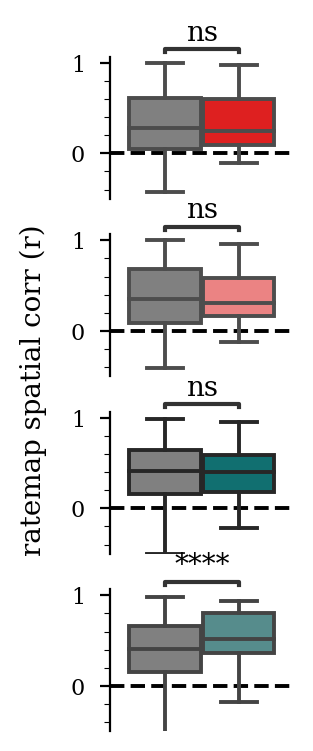

In [18]:
fig, axs = plt.subplots(4,1, figsize=functions.set_size('thesis', fraction=.2, subplots=(6, 1)), edgecolor=None, sharey=True)
fig.subplots_adjust(hspace = 0.25, wspace=.1)
axs = axs.ravel()

# drop duplicates
label_df_subset = label_df.drop_duplicates(subset=["idx_ref","idx_tar","spatial_corr"])
label_df_subset["constant"] = 1

idx = "n_spikes_ref > 100 & n_spikes_tar > 100 & peak_rate_ref > 2 & peak_rate_tar > 2 & cross_label == 'Deep_MEC'"
group_colors = {
    "nonmembers":"#808080",
    "members": "#de2020",
}
sns.set_palette(sns.color_palette(group_colors.values()))
sns.boxplot(
    data=label_df_subset.query(idx),
    y="spatial_corr",
    x="constant",
    hue="ismembers",
    hue_order=group_colors.keys(),
    showfliers=False,
    saturation=1,
    ax=axs[0]
)
box_pairs = [
    ((1, "members"), (1, "nonmembers")),
]
annotator = Annotator(
    axs[0],
    box_pairs,
    data=label_df_subset.query(idx),
    x="constant",
    y="spatial_corr",
    hue="ismembers",
)
annotator.configure(
    test="Mann-Whitney",
    text_format="star",
    loc="outside",
    comparisons_correction=None,
    verbose=1,
)
annotator.apply_and_annotate()


idx = "n_spikes_ref > 100 & n_spikes_tar > 100 & peak_rate_ref > 2 & peak_rate_tar > 2 & cross_label == 'Superficial_MEC'"
group_colors = {
    "nonmembers":"#808080",
    "members": "#eb8383",
}
sns.set_palette(sns.color_palette(group_colors.values()))
sns.boxplot(
    data=label_df_subset.query(idx),
    y="spatial_corr",
    x="constant",
    hue="ismembers",
    showfliers=False,
    saturation=1,
    ax=axs[1]
)
box_pairs = [
    ((1, "members"), (1, "nonmembers")),
]
annotator = Annotator(
    axs[1],
    box_pairs,
    data=label_df_subset.query(idx),
    x="constant",
    y="spatial_corr",
    hue="ismembers",
)
annotator.configure(
    test="Mann-Whitney",
    text_format="star",
    loc="outside",
    comparisons_correction=None,
    verbose=1,
)
annotator.apply_and_annotate()


idx = "n_spikes_ref > 100 & n_spikes_tar > 100 & peak_rate_ref > 2 & peak_rate_tar > 2 & cross_label == 'Deep_PFC'"
group_colors = {
    "nonmembers":"#808080",
    "members": "#116f70",
}
sns.set_palette(sns.color_palette(group_colors.values()))
sns.boxplot(
    data=label_df_subset.query(idx),
    y="spatial_corr",
    x="constant",
    hue="ismembers",
    showfliers=False,
    saturation=1,
    ax=axs[2]
)
box_pairs = [
    ((1, "members"), (1, "nonmembers")),
]
annotator = Annotator(
    axs[2],
    box_pairs,
    data=label_df_subset.query(idx),
    x="constant",
    y="spatial_corr",
    hue="ismembers",
)
annotator.configure(
    test="Mann-Whitney",
    text_format="star",
    loc="outside",
    comparisons_correction=None,
    verbose=1,
)
annotator.apply_and_annotate()


idx = "n_spikes_ref > 100 & n_spikes_tar > 100 & peak_rate_ref > 2 & peak_rate_tar > 2 & cross_label == 'Superficial_PFC'"
group_colors = {
    "nonmembers":"#808080",
    "members": "#568c8c",
}
sns.set_palette(sns.color_palette(group_colors.values()))
sns.boxplot(
    data=label_df_subset.query(idx),
    y="spatial_corr",
    x="constant",
    hue="ismembers",
    showfliers=False,
    saturation=1,
    ax=axs[3]
)
box_pairs = [
    ((1, "members"), (1, "nonmembers")),
]
annotator = Annotator(
    axs[3],
    box_pairs,
    data=label_df_subset.query(idx),
    x="constant",
    y="spatial_corr",
    hue="ismembers",
)
annotator.configure(
    test="Mann-Whitney",
    text_format="star",
    loc="outside",
    comparisons_correction=None,
    verbose=1,
)
annotator.apply_and_annotate()

for i in range(4):
    axs[i].legend("",frameon=False)
    axs[i].set_ylabel('')
    axs[i].set_xlabel('')
    axs[i].yaxis.set_minor_locator(AutoMinorLocator())
    axs[i].axhline(0, color="k", linestyle="--", zorder=-1000)
    axs[i].axes.get_xaxis().set_ticks([])

fig.text(-0.2, 0.5, 'ratemap spatial corr (r)', ha='center', va='center', rotation='vertical')

sns.despine(bottom=True)

# plt.savefig(
#     os.path.join(fig_save_path, "ratemap_corr_cross_region_assemblies_v2.svg"),
#     dpi=300,
#     bbox_inches="tight",
# )

In [19]:
label_df_subset = functions.add_animal_id(label_df_subset)
idx = "n_spikes_ref > 100 & n_spikes_tar > 100 & peak_rate_ref > 2 & peak_rate_tar > 2"

label_df_subset.query(idx).animal_id.nunique()

d:\github\ripple_heterogeneity\ripple_heterogeneity\utils\functions.py:1522: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


13

In [20]:
label_df_subset.query(idx).shape

(85626, 27)

In [86]:
# group_colors = {
#     "Deep_MEC_members": "#de2020",
#     "Deep_MEC_nonmembers": "#de2020",

#     "Superficial_MEC": "#eb8383",
#     "Deep_PFC": "#116f70",
#     "Superficial_PFC": "#568c8c",
# }

# label_df["cross_region_member_label"] = label_df.cross_label + "_" + label_df.ismembers
# label_df["constant"] = 1
# idx = "n_spikes_ref > 100 & n_spikes_tar > 100 & peak_rate_ref > 2 & peak_rate_tar > 2"

# sns.boxplot(data=label_df.query(idx),y="spatial_corr",x="constant",hue="cross_region_member_label")
# plt.legend(bbox_to_anchor=(1.1, 1.05))


<AxesSubplot: xlabel='cross_label', ylabel='spatial_corr'>

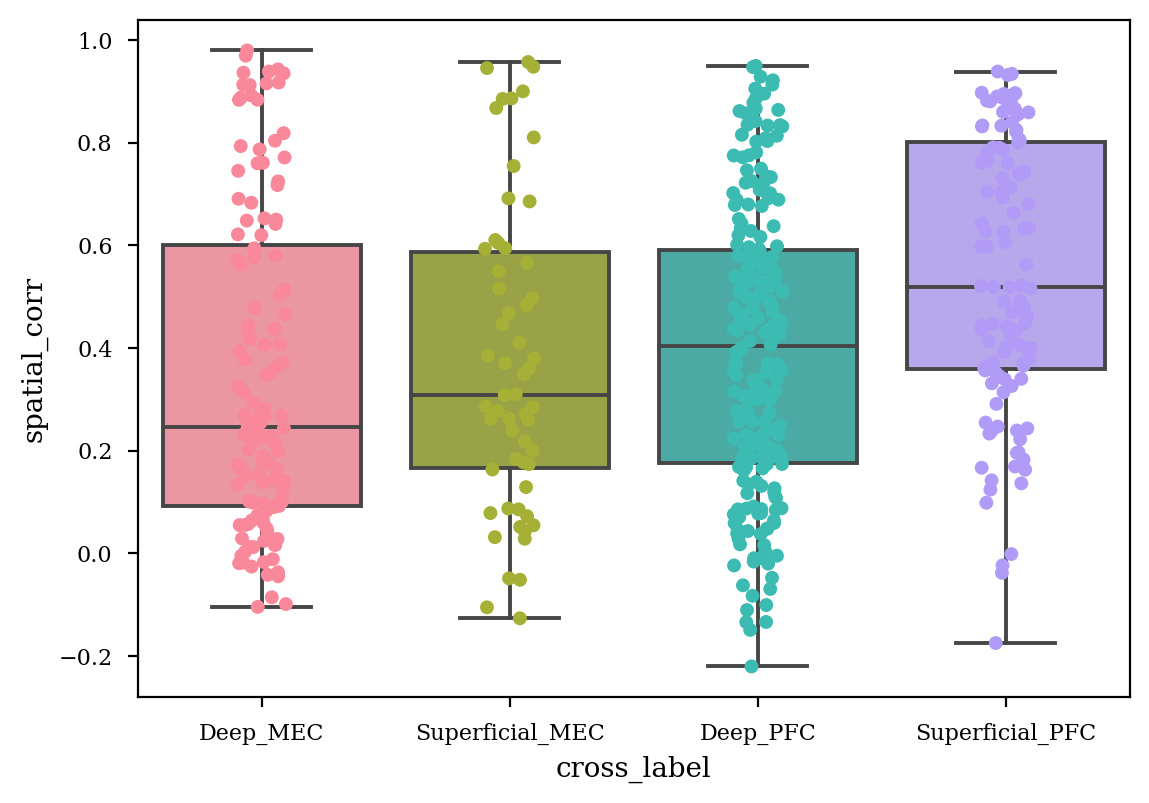

In [21]:
idx = "n_spikes_ref > 100 & n_spikes_tar > 100 & peak_rate_ref > 2 & peak_rate_tar > 2 & ismembers=='members'"

sns.boxplot(data=label_df.query(idx),y="spatial_corr",x="cross_label")
sns.stripplot(data=label_df.query(idx),y="spatial_corr",x="cross_label")
